In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics

import random
random.seed(46)

# Clustering Method
## DBSCAN

In [ ]:
InitialInput=pd.read_csv('input_files/Initial_input.csv')
fd_monday=pd.read_csv('input_files/congestion_results_monday.csv')
fd_tuesday=pd.read_csv('input_files/congestion_results_tuesday.csv')
fd_wednesday=pd.read_csv('input_files/congestion_results_wednesday.csv')
fd_thursday=pd.read_csv('input_files/congestion_results_thursday.csv')

In [ ]:
x_monday = fd_monday[['Entry time [s]',
    'Flow 1 [veh/min]','Density 1 [veh/m]','Congestion index 1',
    'Flow 2 [veh/min]','Density 2 [veh/m]','Congestion index 2',
    'Flow 3 [veh/min]','Density 3 [veh/m]','Congestion index 3'
    ]].to_numpy(dtype=float)
x_tuesday = fd_tuesday[['Entry time [s]',
    'Flow 1 [veh/min]','Density 1 [veh/m]','Congestion index 1',
    'Flow 2 [veh/min]','Density 2 [veh/m]','Congestion index 2',
    'Flow 3 [veh/min]','Density 3 [veh/m]','Congestion index 3'
    ]].to_numpy(dtype=float)
x_wednesday = fd_wednesday[['Entry time [s]',
    'Flow 1 [veh/min]','Density 1 [veh/m]','Congestion index 1',
    'Flow 2 [veh/min]','Density 2 [veh/m]','Congestion index 2',
    'Flow 3 [veh/min]','Density 3 [veh/m]','Congestion index 3'
    ]].to_numpy(dtype=float)
x_thursday = fd_thursday[['Entry time [s]',
    'Flow 1 [veh/min]','Density 1 [veh/m]','Congestion index 1',
    'Flow 2 [veh/min]','Density 2 [veh/m]','Congestion index 2',
    'Flow 3 [veh/min]','Density 3 [veh/m]','Congestion index 3'
    ]].to_numpy(dtype=float)

x_FD=np.concatenate((x_monday,x_tuesday,x_wednesday,x_thursday),axis=0)
x_FD.shape

(9429, 10)

In [ ]:
data=InitialInput[["Track_ID","Avg_Acc_lat", "Avg_speed"]].to_numpy(dtype=float)

In [ ]:
#removes the vehicule with no MC -> distance = 0
ind_nodist = np.where(data[:,2]==0)
data = np.delete(data,ind_nodist,axis=0)
mean = data[:,1:].mean(axis=0) ; std= data[:,1:].std(axis=0)
data_norm = (data[:,1:]-mean)/std 
X=data_norm

In [ ]:
db = DBSCAN(eps=0.1, min_samples=3).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
#print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 19
Estimated number of noise points: 141


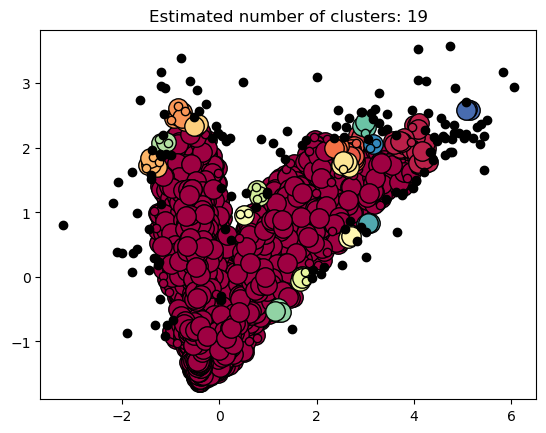

In [ ]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
#plt.savefig('Clustering_eps008')
plt.show()

In [8]:
outliers= list()
for i in range(len(X)):
    if labels[i]==-1:
        outliers.append(data[i,0])
    
len(outliers)

141

## k-NN

In [55]:
##adding a column that will help find the outliers

data=InitialInput[[
     "Avg_speed",
     "Nbr_LaneChange" , "Avg_Acc_tan" , "Avg_Acc_lat"]].to_numpy(dtype=float)

X=pd.DataFrame(data)

knn = NearestNeighbors(n_neighbors = 10)
x = X
mean= x.mean( axis=0)
std= x.std(axis=0)
x=(x-mean)/std
knn.fit(x)
dist, _ = knn.kneighbors(x)

In [56]:
results=InitialInput.copy()
results[f'mean_dist_knn'] = dist.mean(axis=1)

In [57]:
results[f'mean_dist_knn'].std()

0.1751533674657872

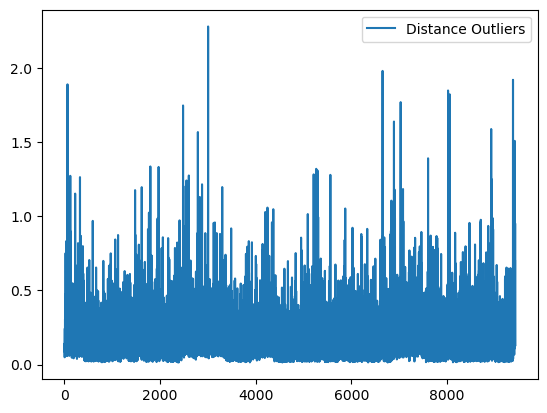

In [58]:
plt.plot((results[f'mean_dist_knn']), label='Distance Outliers')
plt.legend()
plt.show()

In [61]:
threshold=0.5
results[f'knn'] = results[f'mean_dist_knn'] > threshold
number_outliers= results[f'knn'].sum()  
number_outliers

171